In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
pd.options.display.max_columns = 50
pd.options.display.max_rows = 9999
import numpy as numpy

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from tqdm.notebook import tqdm

# 글꼴
if platform.system() == 'Windows':  # 윈도우인 경우, 맑은 고딕
    plt.rc('font', family='Malgun Gothic')

elif platform.system() == 'Darwin':  # Mac 인 경우, AppleGothic(기본 글꼴)
    plt.rc('font', family='AppleGothic')
else:  # 리눅스
    plt.rc('font', family='NanumBarunGothic')

# matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('하루배송_이용자_2103-2105.xlsx')

In [3]:
df.shape

(138178, 13)

In [4]:
df.head()

,회원번호,하루배송 최초구매일,하루배송 최종구매일,하루배송 구매건수,하루배송 거래액,출생년도,나이,이메일,최종로그인,브랜디가입일,푸시수신동의,야간수신동의,수신동의일시
0,3492959,2021-03-01 00:13:33,2021-05-12 20:02:34,10,256300,1994,28,wlskrkejsro@hanmail.net,2021-05-25 19:29:12,2020-06-18 07:55:41,Y,Y,2020-06-18 07:55:53
1,1834641,2021-03-02 05:06:36,2021-04-22 16:11:16,7,222380,2000,22,dabin04120@icloud.com,2021-05-25 20:00:44,2019-03-21 17:54:52,Y,Y,2020-08-29 20:29:02
2,1416448,2021-03-02 10:20:50,2021-05-17 14:13:53,4,71940,1995,27,yearim1014@naver.com,2021-05-25 14:50:52,2018-06-25 19:36:43,Y,Y,2020-07-31 20:29:28
3,1453306,2021-03-02 10:29:30,2021-05-19 21:12:26,10,200290,1995,27,zosel9654@naver.com,2021-05-20 20:18:04,2018-07-17 01:51:21,Y,Y,2020-07-29 14:33:23
4,114775,2021-03-02 11:08:08,2021-04-02 10:55:40,2,37500,1997,25,ppa025@naver.com,2021-05-20 00:13:25,2016-07-18 02:36:13,Y,Y,2020-08-02 15:30:36


# 스토리보드

In [ ]:
데이터: 최근 3개월간 하루배송 서비스를 이용한 20대 고객(한국나이 20 - 29)

In [ ]:
- 전체 배송 횟수 대비 하루배송 이용률: 전체 배송 집계 필요
- 전체 회원수 대비 하루배송 이용자 비율: 전체 회원수(기존 데이터 집계 확인 - 하지만 기간이 상이 >> 최근 3개월 일자로 축소해서 파악해야 할듯?)
- 하루배송 이용자의 연령대 분포(20대 중): 실질적 코어타겟인 24-26은 하루배송을 얼마나 사용하고 있을까? / 전체 24-26 고객의 주문수를 알고 비교하면 더 좋을듯
- 하루배송 구매 건수 - (인당) 평균, 상위, 최소
    > 평균 수치
    > 상위 고객 - top 5 - 전체 구매 대비 하루배송 이용 비율은? 하루배송 이용 비율이 높다면 하루배송 시스템 자체가 이사람들한테는 주요 후킹 포인트일까? - 어떤 점이 그렇게 좋은 걸까?
    > 1건에서 끝난 경우: 신규로 하루배송 서비스에 유입되었다고 할 수 있음. 하루배송 관심도 부분에서 3개월 이내에 재구매 안했다고 하루배송의 문제라고 보긴 어려울 듯.(그냥 구매를 안하는 것일 수도 있어서 - 전체 구매 추이랑 비교해야 파악할 수 있을 듯) 
        >> 최근 3개월이 아닌 전체 하루배송 경험 이후로 하루배송 재구매가 이루어지지 않는 고객을 찾아서 이유를 찾아볼 순 있을 듯
    #전체 하루배송 서비스 이용 고객 데이터 내 이용수 1건의 경우는 아래와 같은 플로우가 가능할 듯
    #하루배송이 매력 없나? -> 일반 구매가 있을 수도 있는 거지. - 하지만 최종구매일과 최종로그인간의 갭이 클 경우, 하루배송 만족도가 재구매까지는 이어지지 않는건가?
- 하루배송 거래액 - 평균, 상위, 최소
    > 평균 수치: 전체 회원의 주문 1회 당 거래액 평균치와 비교하면 좋을듯
    > 상위 고객

- 하루배송 최초 구매일 -> 어떤 원인? 어떤 마케팅으로 유입된 거지? - 구매 상품, 쿠폰
- 하루배송 상품의 반품율 (= 만족도 파악): 취소상품 수, 취소상품상세 수, 취소 일자 등 필요

In [ ]:
[하루배송 현황 스토리보드]
- 전체 회원수 대비 하루배송 이용자 비율: 전체 회원수 집계(요청)
- 하루배송 이용자의 연령대 분포(20대 중): 실질적 코어타겟인 24-26은 하루배송을 얼마나 사용하고 있을까? / 전체 24-26 고객의 주문수를 알고 비교하면 더 좋을듯
- 하루배송 구매 건수 - (인당) 평균, 상위, 최소
    > 평균 수치
    > 상위 고객 top 5 - 전체 구매 대비 하루배송 이용 비율은?
    > 1건에서 끝난 경우: 신규로 하루배송 서비스에 유입되었다고 할 수 있음. 하루배송 관심도 부분에서 3개월 이내에 재구매 안했다고 하루배송의 문제라고 보긴 어려울 듯.
- 하루배송 거래액 - (인당) 평균, 최대, 최소
    > 평균 수치: 전체 회원의 주문 1회 당 거래액 평균치와 비교하면 좋을듯
    > 최대- 최소
- 하루배송 주문 시간대: 주요 주문 요일, 시간대 파악

# 분석

In [11]:
df.head()

,회원번호,하루배송 최초구매일,하루배송 최종구매일,하루배송 구매건수,하루배송 거래액,출생년도,나이,이메일,최종로그인,브랜디가입일,푸시수신동의,야간수신동의,수신동의일시
0,3492959,2021-03-01 00:13:33,2021-05-12 20:02:34,10,256300,1994,28,wlskrkejsro@hanmail.net,2021-05-25 19:29:12,2020-06-18 07:55:41,Y,Y,2020-06-18 07:55:53
1,1834641,2021-03-02 05:06:36,2021-04-22 16:11:16,7,222380,2000,22,dabin04120@icloud.com,2021-05-25 20:00:44,2019-03-21 17:54:52,Y,Y,2020-08-29 20:29:02
2,1416448,2021-03-02 10:20:50,2021-05-17 14:13:53,4,71940,1995,27,yearim1014@naver.com,2021-05-25 14:50:52,2018-06-25 19:36:43,Y,Y,2020-07-31 20:29:28
3,1453306,2021-03-02 10:29:30,2021-05-19 21:12:26,10,200290,1995,27,zosel9654@naver.com,2021-05-20 20:18:04,2018-07-17 01:51:21,Y,Y,2020-07-29 14:33:23
4,114775,2021-03-02 11:08:08,2021-04-02 10:55:40,2,37500,1997,25,ppa025@naver.com,2021-05-20 00:13:25,2016-07-18 02:36:13,Y,Y,2020-08-02 15:30:36


## 전체 회원수 대비 하루배송 이용자 비율

- 전체 회원 집계 요청(21.05.25 기점)
- 전체 하루배송 이용자 집계 요청(21.05.25 기점)
* 하루배송 시작 시점 => 2020.05.26
* 데이터 추출 기간 모두 통일 필요

In [3]:
df.head()

,회원번호,하루배송 최초구매일,하루배송 최종구매일,하루배송 구매건수,하루배송 거래액,출생년도,나이,이메일,최종로그인,브랜디가입일,푸시수신동의,야간수신동의,수신동의일시
0,3492959,2021-03-01 00:13:33,2021-05-12 20:02:34,10,256300,1994,28,wlskrkejsro@hanmail.net,2021-05-25 19:29:12,2020-06-18 07:55:41,Y,Y,2020-06-18 07:55:53
1,1834641,2021-03-02 05:06:36,2021-04-22 16:11:16,7,222380,2000,22,dabin04120@icloud.com,2021-05-25 20:00:44,2019-03-21 17:54:52,Y,Y,2020-08-29 20:29:02
2,1416448,2021-03-02 10:20:50,2021-05-17 14:13:53,4,71940,1995,27,yearim1014@naver.com,2021-05-25 14:50:52,2018-06-25 19:36:43,Y,Y,2020-07-31 20:29:28
3,1453306,2021-03-02 10:29:30,2021-05-19 21:12:26,10,200290,1995,27,zosel9654@naver.com,2021-05-20 20:18:04,2018-07-17 01:51:21,Y,Y,2020-07-29 14:33:23
4,114775,2021-03-02 11:08:08,2021-04-02 10:55:40,2,37500,1997,25,ppa025@naver.com,2021-05-20 00:13:25,2016-07-18 02:36:13,Y,Y,2020-08-02 15:30:36


In [4]:
df.shape

(138178, 13)

In [5]:
len(df['회원번호'].unique())

138178

- 최근 3개월 하루배송을 이용한 20대: 138,178

## 하루배송 이용자 - 20대 비율

In [10]:
df['나이'].value_counts().to_frame()

,나이
25,16601
26,16168
24,15681
27,15404
23,14630
28,13694
22,13150
29,11870
21,11786
20,9194


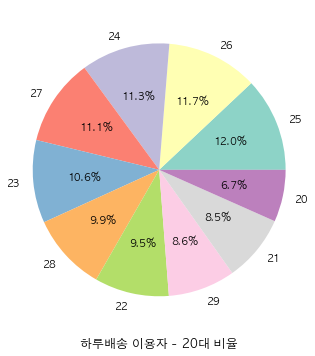

In [193]:
qualitative_colors = sns.color_palette("Set3", 10)
sns.set_palette(qualitative_colors)
plt.figure(figsize=(5,6))
df['나이'].value_counts().plot.pie(autopct='%.1f%%')
plt.axis('equal')
plt.ylabel('')
plt.xlabel('하루배송 이용자 - 20대 비율', fontsize=12)
plt.show()

## 하루배송 구매 건수

- (인당)평균, 상위, 하위

In [20]:
df['하루배송 구매건수'].mean()

2.4626134406345437

In [21]:
df['하루배송 구매건수'].sort_values(ascending=False).to_frame().head()

,하루배송 구매건수
8278,100
921,95
82,58
901,55
50,54


In [7]:
df.sort_values(by='하루배송 구매건수', ascending=False)[:10]

,회원번호,하루배송 최초구매일,하루배송 최종구매일,하루배송 구매건수,하루배송 거래액,출생년도,나이,이메일,최종로그인,브랜디가입일,푸시수신동의,야간수신동의,수신동의일시
8278,2411646,2021-03-13 17:50:39,2021-05-24 12:11:27,100,2445260,1994,28,lsol26@naver.com,2021-05-25 23:20:56,2019-10-15 00:53:12,Y,Y,2020-08-02 23:51:05
921,3816811,2021-03-03 18:47:43,2021-05-21 00:56:09,95,1784240,1998,24,bz5auyekgm@privaterelay.appleid.com,2021-05-21 18:02:02,2020-08-30 15:14:56,Y,Y,2020-08-30 15:15:04
82,24088,2021-03-02 00:10:38,2021-05-24 18:21:20,58,1146540,1996,26,ddwde@naver.com,2021-05-26 00:38:17,2015-10-16 20:01:15,Y,Y,2020-07-28 19:07:15
901,1120743,2021-03-02 14:00:57,2021-05-11 13:49:24,55,1176170,1993,29,leejune203@naver.com,2021-05-25 10:46:36,2018-01-28 19:37:03,Y,Y,2020-07-28 15:56:35
50,135010,2021-03-05 15:43:38,2021-05-18 22:28:10,54,1162050,1997,25,wltnwjd97@naver.com,2021-05-25 13:54:19,2016-08-02 15:43:22,Y,Y,2020-07-30 20:20:56
20427,1259285,2021-03-09 18:23:01,2021-05-24 13:00:24,53,1122020,1997,25,yhw302@naver.com,2021-05-25 21:47:53,2018-03-25 19:33:11,Y,Y,2020-09-12 13:15:08
478,1610478,2021-03-04 10:20:37,2021-05-25 10:47:42,48,87510,1997,25,pdw04330@naver.com,2021-05-26 00:53:24,2018-11-12 14:53:04,Y,Y,2020-07-28 14:27:18
980,3658820,2021-03-05 03:40:48,2021-05-23 04:10:05,48,1091000,1997,25,spark30@berklee.edu,2021-05-23 03:07:23,2020-07-27 18:40:47,Y,Y,2020-07-27 18:40:47
1245,3365252,2021-03-02 19:20:06,2021-05-24 19:09:03,46,1203490,1993,29,hr4247@naver.com,2021-05-24 21:42:39,2020-05-18 21:12:25,Y,Y,2020-07-28 13:51:53
6648,1220093,2021-03-24 19:54:59,2021-05-24 16:58:35,45,919960,1998,24,ski05256@naver.com,2021-05-25 15:42:46,2018-03-06 22:03:32,Y,Y,2020-08-13 08:51:44


In [9]:
df.sort_values(by='하루배송 최초구매일', ascending=True)[:10]

,회원번호,하루배송 최초구매일,하루배송 최종구매일,하루배송 구매건수,하루배송 거래액,출생년도,나이,이메일,최종로그인,브랜디가입일,푸시수신동의,야간수신동의,수신동의일시
60580,1353512,2021-03-01 00:00:10,2021-03-01 00:00:10,1,22800,1994,28,wldyd7539@naver.com,2021-05-25 01:04:05,2018-05-20 00:07:30,Y,Y,2020-08-31 00:14:36
335,2072116,2021-03-01 00:00:26,2021-03-01 00:00:26,1,29200,1994,28,ji_eun4456@naver.com,2021-05-19 19:10:55,2019-06-15 15:45:23,Y,Y,2020-06-07 10:20:22
50835,523905,2021-03-01 00:02:54,2021-04-28 14:02:03,6,97750,1997,25,zzo_o1@nate.com,2021-05-23 17:53:49,2017-05-25 23:40:03,Y,Y,2020-08-05 00:17:46
35838,1795779,2021-03-01 00:02:56,2021-03-01 00:02:56,5,99000,1995,27,minjuzzang12@naver.com,2021-05-21 10:13:00,2019-03-03 18:01:13,Y,Y,2021-02-05 19:05:56
89135,1507865,2021-03-01 00:03:24,2021-03-01 00:03:24,1,23750,1997,25,chsmmn@hanmail.net,2021-05-24 20:23:31,2018-08-30 13:18:45,Y,Y,2020-07-30 03:23:04
28620,217606,2021-03-01 00:03:30,2021-04-22 10:00:39,5,55890,1993,29,langey@naver.com,2021-05-26 01:02:12,2016-10-02 02:23:53,Y,Y,2020-12-26 14:57:39
24579,203979,2021-03-01 00:04:11,2021-03-01 00:04:11,1,16060,1999,23,kimry4609@icloud.com,2021-05-20 17:35:27,2016-09-24 13:30:48,Y,Y,2020-08-02 11:20:43
32190,3680102,2021-03-01 00:06:36,2021-03-10 18:02:35,3,54130,2000,22,han_c0@naver.com,2021-05-21 13:45:08,2020-07-31 23:13:24,Y,Y,2020-07-31 23:13:35
67011,1470144,2021-03-01 00:06:48,2021-05-01 08:22:24,4,69320,1993,29,yms2784@hanmail.net,2021-05-22 16:45:31,2018-07-29 00:43:41,Y,Y,2020-08-01 20:44:43
68322,5115713,2021-03-01 00:10:21,2021-03-01 00:10:21,1,18720,2001,21,get0118@naver.com,2021-05-13 10:24:35,2021-02-28 17:42:58,Y,Y,2021-02-28 17:43:06


In [25]:
df.iloc[8278].to_frame().T

,회원번호,하루배송 최초구매일,하루배송 최종구매일,하루배송 구매건수,하루배송 거래액,출생년도,나이,이메일,최종로그인,브랜디가입일,푸시수신동의,야간수신동의,수신동의일시
8278,2411646,2021-03-13 17:50:39,2021-05-24 12:11:27,100,2445260,1994,28,lsol26@naver.com,2021-05-25 23:20:56,2019-10-15 00:53:12,Y,Y,2020-08-02 23:51:05


In [22]:
df['하루배송 구매건수'].sort_values(ascending=True).to_frame().head()

,하루배송 구매건수
138177,1
81048,1
81047,1
81045,1
81044,1


In [27]:
df[df['하루배송 구매건수'] == 1].shape

(64601, 13)

<AxesSubplot:>

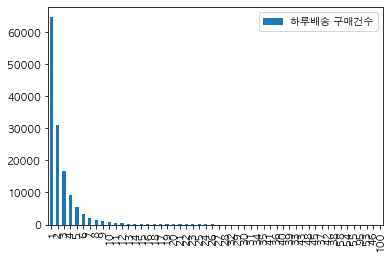

In [14]:
df['하루배송 구매건수'].value_counts().to_frame().plot.bar()

In [16]:
df['하루배송 구매건수'].value_counts().to_frame().reset_index().rename(columns={'index':'구매건수', '하루배송 구매건수':'집계'})

,구매건수,집계
0,1,64601
1,2,31187
2,3,16620
3,4,9189
4,5,5415
5,6,3447
6,7,2160
7,8,1519
8,9,1023
9,10,723


<BarContainer object of 52 artists>

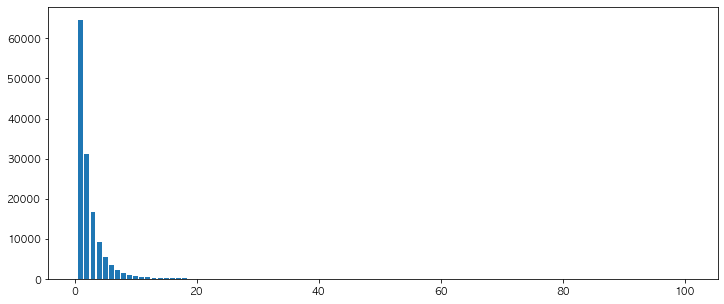

In [22]:
plt.figure(figsize=(12,5))
plt.bar(df['하루배송 구매건수'].value_counts().to_frame().reset_index().rename(columns={'index':'구매건수', '하루배송 구매건수':'집계'}).구매건수, df['하루배송 구매건수'].value_counts().to_frame().reset_index().rename(columns={'index':'구매건수', '하루배송 구매건수':'집계'}).집계)

### 구매건수 == 1, 2, 3

In [5]:
df[df['하루배송 구매건수'] == 1].shape

(64601, 13)

In [6]:
b1 = df[df['하루배송 구매건수'] == 1]

In [7]:
b1.head()

,회원번호,하루배송 최초구매일,하루배송 최종구매일,하루배송 구매건수,하루배송 거래액,출생년도,나이,이메일,최종로그인,브랜디가입일,푸시수신동의,야간수신동의,수신동의일시
15,1072042,2021-03-03 01:15:40,2021-03-03 01:15:40,1,14700,1997,25,8828236@hyundai.com,2021-04-18 23:53:01,2018-01-13 11:10:22,Y,Y,2020-08-21 23:36:14
16,2976774,2021-03-03 10:21:17,2021-03-03 10:21:17,1,15870,1996,26,sjkid89@google.com,2021-05-24 13:28:09,2020-02-16 16:55:28,Y,Y,2020-07-31 18:25:07
18,4927465,2021-03-03 13:05:07,2021-03-03 13:05:07,1,22800,2002,20,a93505314@gmail.com,2021-05-24 14:46:03,2021-02-02 23:14:15,Y,Y,2021-02-02 23:14:15
28,5146899,2021-03-04 13:14:51,2021-03-04 13:14:51,1,26800,1995,27,ycon6323@gmail.com,2021-03-06 03:19:06,2021-03-04 13:03:44,Y,Y,2021-03-04 13:03:55
32,2803372,2021-03-04 21:38:33,2021-03-04 21:38:33,1,10500,1999,23,freefca1213@naver.com,2021-05-14 08:16:39,2020-01-18 16:03:20,Y,Y,2021-02-10 00:12:44


In [8]:
b1['하루배송 거래액'].mean()

19793.44267116608

In [9]:
b1['나이'].mean()

24.58530053714339

In [22]:
b1['나이'].value_counts()

25    7650
24    7512
26    7197
23    7053
27    6783
22    6600
28    6088
21    5888
29    5367
20    4463
Name: 나이, dtype: int64

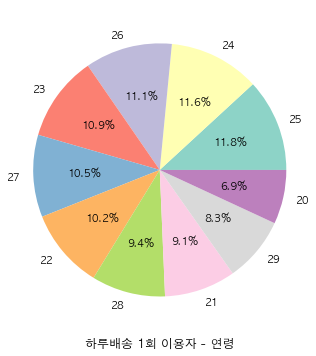

In [21]:
qualitative_colors = sns.color_palette("Set3", 10)
sns.set_palette(qualitative_colors)
plt.figure(figsize=(5,6))
b1['나이'].value_counts().plot.pie(autopct='%.1f%%')
plt.axis('equal')
plt.ylabel('')
plt.xlabel('하루배송 1회 이용자 - 연령', fontsize=12)
plt.show()

In [10]:
len(b1['회원번호'].unique())

64601

In [11]:
df.shape

(138178, 13)

In [19]:
df[df['하루배송 구매건수'] == 2]['나이'].mean()

24.684483919581876

In [78]:
df[df['하루배송 구매건수'] == 2]['하루배송 거래액'].mean()/2

19322.072337833073

In [20]:
df[df['하루배송 구매건수'] == 3]['나이'].mean()

24.76468110709988

In [79]:
df[df['하루배송 구매건수'] == 3]['하루배송 거래액'].mean()/3

19338.744283995187

In [16]:
(16620/138178)*100

12.027963930582294

In [10]:
pd.pivot_table(df, columns='나이', index='하루배송 구매건수', values='회원번호', aggfunc='count').fillna(0).to_excel('하루배송현황_추가테이블.xlsx')

## 하루배송 거래액

In [13]:
df['하루배송 거래액'].mean()

48166.378149922566

In [18]:
df['하루배송 거래액'].sort_values(ascending=False).to_frame().head()

,하루배송 거래액
8278,2445260
921,1784240
1245,1203490
901,1176170
50,1162050


In [25]:
df.sort_values(by='하루배송 거래액',ascending=False).head()

,회원번호,하루배송 최초구매일,하루배송 최종구매일,하루배송 구매건수,하루배송 거래액,출생년도,나이,이메일,최종로그인,브랜디가입일,푸시수신동의,야간수신동의,수신동의일시
8278,2411646,2021-03-13 17:50:39,2021-05-24 12:11:27,100,2445260,1994,28,lsol26@naver.com,2021-05-25 23:20:56,2019-10-15 00:53:12,Y,Y,2020-08-02 23:51:05
921,3816811,2021-03-03 18:47:43,2021-05-21 00:56:09,95,1784240,1998,24,bz5auyekgm@privaterelay.appleid.com,2021-05-21 18:02:02,2020-08-30 15:14:56,Y,Y,2020-08-30 15:15:04
1245,3365252,2021-03-02 19:20:06,2021-05-24 19:09:03,46,1203490,1993,29,hr4247@naver.com,2021-05-24 21:42:39,2020-05-18 21:12:25,Y,Y,2020-07-28 13:51:53
901,1120743,2021-03-02 14:00:57,2021-05-11 13:49:24,55,1176170,1993,29,leejune203@naver.com,2021-05-25 10:46:36,2018-01-28 19:37:03,Y,Y,2020-07-28 15:56:35
50,135010,2021-03-05 15:43:38,2021-05-18 22:28:10,54,1162050,1997,25,wltnwjd97@naver.com,2021-05-25 13:54:19,2016-08-02 15:43:22,Y,Y,2020-07-30 20:20:56


In [19]:
df['하루배송 거래액'].sort_values(ascending=True).to_frame().head()

,하루배송 거래액
50373,100
42722,120
77862,190
87657,230
75995,250


In [26]:
df.sort_values(by='하루배송 거래액',ascending=True).head()

,회원번호,하루배송 최초구매일,하루배송 최종구매일,하루배송 구매건수,하루배송 거래액,출생년도,나이,이메일,최종로그인,브랜디가입일,푸시수신동의,야간수신동의,수신동의일시
50373,896627,2021-03-10 12:05:25,2021-03-10 12:05:25,1,100,1998,24,tlswldud8528@naver.com,2021-05-24 13:32:40,2017-10-28 22:24:39,Y,Y,2020-07-28 15:27:30
42722,1526429,2021-03-16 12:00:28,2021-03-16 12:00:28,1,120,1999,23,jisu8045@naver.com,2021-05-25 10:37:01,2018-09-13 11:36:14,Y,Y,2020-09-27 15:20:46
77862,2032038,2021-03-04 10:20:26,2021-03-04 10:20:26,1,190,1997,25,ttkk43@naver.com,2021-05-25 17:35:12,2019-05-29 22:58:04,Y,Y,2020-07-29 18:45:33
87657,2112038,2021-03-10 12:02:14,2021-03-10 12:02:14,1,230,1995,27,k8884415@naver.com,2021-05-24 18:30:43,2019-07-01 12:23:16,Y,Y,2020-09-01 12:14:51
75995,2794881,2021-03-16 12:00:29,2021-03-16 12:00:29,1,250,1996,26,twin961@naver.com,2021-05-21 17:30:46,2020-01-16 16:06:08,Y,Y,2020-09-17 19:31:36


### 구매 범주 구성

In [ ]:
~ 1만원 미만 : 1
1 - 2: 2
2 - 3: 3
3 - 4: 4
4 - 5: 5
5 - 6: 6
6 - 7: 7
7 - 8: 8
8 - 9: 9 
9 - 10: 10
10 - 11: 11
11만원 이상 ~ : 12

** 하루배송 거래액을 기준으로 회원수 집계 -> 평균값 (한 금액당) 8명 꼴
** 전체 거래액에 대한 회원수 집계가 8명 이상인 애들로 기준 잡음 => 990 ~ 102700원

In [39]:
df['하루배송 거래액'].value_counts().to_frame()['하루배송 거래액'].mean()

8.4912431635224

In [40]:
df['하루배송 거래액'].value_counts().to_frame()['하루배송 거래액'].median()

2.0

In [43]:
df['하루배송 거래액'].value_counts().to_frame()[df['하루배송 거래액'].value_counts().to_frame()['하루배송 거래액'] > 8].reset_index().sort_values(by=['index'], ascending=False)

,index,하루배송 거래액
1523,102700,10
1905,102300,9
1815,98600,9
1231,96900,12
1388,96750,11
1692,95200,9
1775,94500,9
1380,94300,11
1899,92800,9
1495,92000,11


In [44]:
df['하루배송 거래액'].max()

2445260

In [11]:
standard = pd.DataFrame({'min':[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000],'max':[10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,2500000],'range':[1,2,3,4,5,6,7,8,9,10,11,12]})

In [18]:
standard

,min,max,range
0,0,10000,1
1,10000,20000,2
2,20000,30000,3
3,30000,40000,4
4,40000,50000,5
5,50000,60000,6
6,60000,70000,7
7,70000,80000,8
8,80000,90000,9
9,90000,100000,10


In [12]:
df.insert(4,'거래액 범주', None)

In [13]:
df.columns

Index(['회원번호', '하루배송 최초구매일', '하루배송 최종구매일', '하루배송 구매건수', '거래액 범주', '하루배송 거래액',
       '출생년도', '나이', '이메일', '최종로그인', '브랜디가입일', '푸시수신동의', '야간수신동의', '수신동의일시'],
      dtype='object')

In [14]:
for i in tqdm(range(0, 12)):
    df.loc[((df['하루배송 거래액'] >= standard.iloc[i]['min'])&(df['하루배송 거래액'] < standard.iloc[i]['max'])), '거래액 범주'] = standard.iloc[i]['range']
    print('범주 {}: '.format(i+1), df[df['거래액 범주'] == standard.iloc[i]['range']].shape)

범주 1:  (4766, 14)
범주 2:  (33888, 14)
범주 3:  (28134, 14)
범주 4:  (16994, 14)
범주 5:  (12428, 14)
범주 6:  (9461, 14)
범주 7:  (6978, 14)
범주 8:  (5073, 14)
범주 9:  (3993, 14)
범주 10:  (2975, 14)
범주 11:  (2338, 14)
범주 12:  (11150, 14)



In [15]:
df.shape

(138178, 14)

In [81]:
(33888/138178)*100

24.524888187699922

In [82]:
(28134/138178)*100

20.360694177075946

In [83]:
(16994/138178)*100

12.298629304230776

In [17]:
pd.pivot_table(df, columns='나이', index='거래액 범주', values='회원번호', aggfunc='count').to_excel('하루배송_추가.xlsx')

### 범주별 소비 연령

In [88]:
print('범주1', df[df['거래액 범주'] == 1]['나이'].mean())
print('범주2', df[df['거래액 범주'] == 2]['나이'].mean())
print('범주3', df[df['거래액 범주'] == 3]['나이'].mean())
print('범주4', df[df['거래액 범주'] == 4]['나이'].mean())
print('범주5', df[df['거래액 범주'] == 5]['나이'].mean())
print('범주6', df[df['거래액 범주'] == 6]['나이'].mean())
print('범주7', df[df['거래액 범주'] == 7]['나이'].mean())
print('범주8', df[df['거래액 범주'] == 8]['나이'].mean())
print('범주9', df[df['거래액 범주'] == 9]['나이'].mean())
print('범주10', df[df['거래액 범주'] == 10]['나이'].mean())
print('범주11', df[df['거래액 범주'] == 11]['나이'].mean())
print('범주12', df[df['거래액 범주'] == 12]['나이'].mean())

범주1 24.336130927402433
범주2 24.464618744098207
범주3 24.664676192507287
범주4 24.690361303989643
범주5 24.764322497586097
범주6 24.747066906246697
범주7 24.84279163083978
범주8 24.890005913660556
범주9 24.89306286000501
범주10 25.023193277310924
범주11 25.001283147989735
범주12 25.122690582959642


In [89]:
print('범주1', df[df['거래액 범주'] == 1]['나이'].median())
print('범주2', df[df['거래액 범주'] == 2]['나이'].median())
print('범주3', df[df['거래액 범주'] == 3]['나이'].median())
print('범주4', df[df['거래액 범주'] == 4]['나이'].median())
print('범주5', df[df['거래액 범주'] == 5]['나이'].median())
print('범주6', df[df['거래액 범주'] == 6]['나이'].median())
print('범주7', df[df['거래액 범주'] == 7]['나이'].median())
print('범주8', df[df['거래액 범주'] == 8]['나이'].median())
print('범주9', df[df['거래액 범주'] == 9]['나이'].median())
print('범주10', df[df['거래액 범주'] == 10]['나이'].median())
print('범주11', df[df['거래액 범주'] == 11]['나이'].median())
print('범주12', df[df['거래액 범주'] == 12]['나이'].median())

범주1 24.0
범주2 24.0
범주3 25.0
범주4 25.0
범주5 25.0
범주6 25.0
범주7 25.0
범주8 25.0
범주9 25.0
범주10 25.0
범주11 25.0
범주12 25.0


In [91]:
df[df['거래액 범주'] == 12]['나이'].value_counts().sum()

11150

In [92]:
df[df['거래액 범주'] == 12]['나이'].value_counts()

26    1487
27    1470
25    1348
28    1337
24    1207
23    1104
29    1099
22     859
21     721
20     518
Name: 나이, dtype: int64

In [96]:
df[df['거래액 범주'] == 2]['나이'].value_counts().sum()

33888

In [97]:
df[df['거래액 범주'] == 2]['나이'].value_counts()

24    4007
25    3940
23    3869
26    3636
22    3573
27    3423
21    3269
28    2990
29    2650
20    2531
Name: 나이, dtype: int64

In [101]:
df[df['거래액 범주'] == 3]['나이'].value_counts().sum()

28134

In [102]:
df[df['거래액 범주'] == 3]['나이'].value_counts()

25    3337
26    3252
24    3202
27    3044
23    2897
22    2847
28    2800
21    2493
29    2405
20    1857
Name: 나이, dtype: int64

In [105]:
(3202/28134)*100

11.381246889884126

In [85]:
df[df['거래액 범주'] == 2]['나이'].mean()

24.464618744098207

In [86]:
df[df['거래액 범주'] == 12]['나이'].mean()

25.122690582959642

In [67]:
df_price = df[['하루배송 거래액', '거래액 범주']].rename(columns={'하루배송 거래액':'거래액', '거래액 범주':'범주'})

In [68]:
df_price.head()

,거래액,범주
0,256300,12
1,222380,12
2,71940,8
3,200290,12
4,37500,4


In [72]:
df_price = df_price[-(df_price['범주'] ==12)]

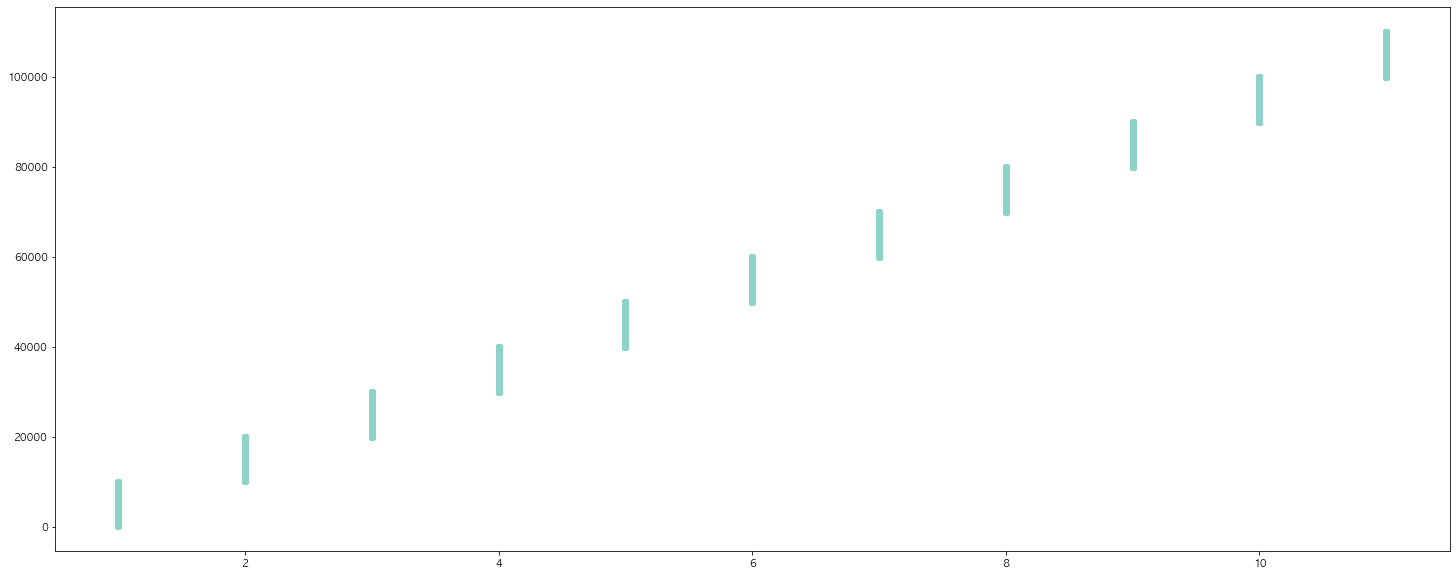

In [77]:
plt.figure(figsize=(25,10))
plt.scatter(df_price.범주,df_price.거래액)

## 하루배송 주문 시간대

In [ ]:
- 요일: 어떤 요일에 많이 사?
- 주문 시간대: 어떤 시간대 많이 사?
- 요일별로 주문시간대가 다를 수 있지 않을까?
>> 요일별 주문 시간대 파악

In [ ]:
▷ 새벽도착
- 당일 오후 1시~오후 7시 59분까지 결제 시 다음날 오전 7시까지 도착
※ 서울 지역에 한함

▷ 저녁도착
- 전일 오후 8시~당일 오후 12시 59분까지 결제 시 당일 저녁 8시까지 도착
※ 서울 지역에 한함

# 21.05.28일 상용 반영

▷오늘출발(택배배송)
- 당일 1시 59분까지 결제 시 다음날 도착
※ 전 지역 한함

### 요일

In [28]:
df.head()

,회원번호,하루배송 최초구매일,하루배송 최종구매일,하루배송 구매건수,하루배송 거래액,출생년도,나이,이메일,최종로그인,브랜디가입일,푸시수신동의,야간수신동의,수신동의일시
0,3492959,2021-03-01 00:13:33,2021-05-12 20:02:34,10,256300,1994,28,wlskrkejsro@hanmail.net,2021-05-25 19:29:12,2020-06-18 07:55:41,Y,Y,2020-06-18 07:55:53
1,1834641,2021-03-02 05:06:36,2021-04-22 16:11:16,7,222380,2000,22,dabin04120@icloud.com,2021-05-25 20:00:44,2019-03-21 17:54:52,Y,Y,2020-08-29 20:29:02
2,1416448,2021-03-02 10:20:50,2021-05-17 14:13:53,4,71940,1995,27,yearim1014@naver.com,2021-05-25 14:50:52,2018-06-25 19:36:43,Y,Y,2020-07-31 20:29:28
3,1453306,2021-03-02 10:29:30,2021-05-19 21:12:26,10,200290,1995,27,zosel9654@naver.com,2021-05-20 20:18:04,2018-07-17 01:51:21,Y,Y,2020-07-29 14:33:23
4,114775,2021-03-02 11:08:08,2021-04-02 10:55:40,2,37500,1997,25,ppa025@naver.com,2021-05-20 00:13:25,2016-07-18 02:36:13,Y,Y,2020-08-02 15:30:36


In [35]:
type(df['하루배송 최초구매일'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [36]:
type(df['하루배송 최종구매일'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [38]:
df.shape

(138178, 13)

In [6]:
df_date = pd.concat([df['하루배송 최초구매일'], df['하루배송 최종구매일']]).to_frame().rename(columns={0:'하루배송 이용일자'})

In [45]:
df_date

,하루배송 이용일자
0,2021-03-01 00:13:33
1,2021-03-02 05:06:36
2,2021-03-02 10:20:50
3,2021-03-02 10:29:30
4,2021-03-02 11:08:08
...,...
138173,2021-05-25 11:36:56
138174,2021-05-25 15:04:29
138175,2021-05-25 15:32:39
138176,2021-05-25 16:59:00


In [7]:
df_date['요일'] = df_date['하루배송 이용일자'].dt.day_name()

In [58]:
df_date['요일'].value_counts().to_frame().reset_index().rename(columns={'index':'요일', '요일':'회원수'})

,요일,회원수
0,Tuesday,52784
1,Wednesday,50711
2,Thursday,49084
3,Monday,45061
4,Friday,32502
5,Sunday,25980
6,Saturday,20234


<AxesSubplot:>

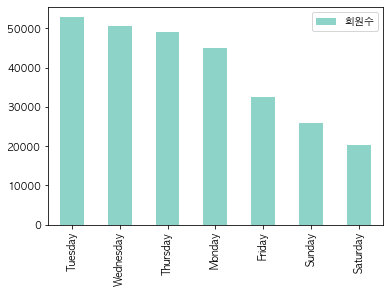

In [67]:
df_date['요일'].value_counts().to_frame().rename(columns={'요일':'회원수'}).plot(kind='bar')

- 하루배송 주문수 기준 요일 나열: 화 > 수 > 목 > 월 > 금 > 일 > 토

### 시간

포멧 코드 요약 표: https://dojang.io/mod/page/view.php?id=2463

In [8]:
df_date['시간'] = df_date['하루배송 이용일자'].dt.strftime('%H:%M:%S')

- 시 분 초 중 시만 남겨서 작업하기

In [9]:
df_date['시'] = df_date['하루배송 이용일자'].dt.strftime('%H')

In [70]:
df_date.head()

,하루배송 이용일자,요일,시간,시
0,2021-03-01 00:13:33,Monday,00:13:33,00
1,2021-03-02 05:06:36,Tuesday,05:06:36,05
2,2021-03-02 10:20:50,Tuesday,10:20:50,10
3,2021-03-02 10:29:30,Tuesday,10:29:30,10
4,2021-03-02 11:08:08,Tuesday,11:08:08,11


In [86]:
sam = df_date['시'].value_counts().to_frame().reset_index().rename(columns={'index':'시간', '시':'주문회원수'}).sort_values(by='시간')

In [89]:
sam

,시간,주문회원수
7,00,14371
15,01,10855
17,02,7209
19,03,4441
21,04,2915
23,05,1743
22,06,1908
20,07,3576
18,08,6256
16,09,8112


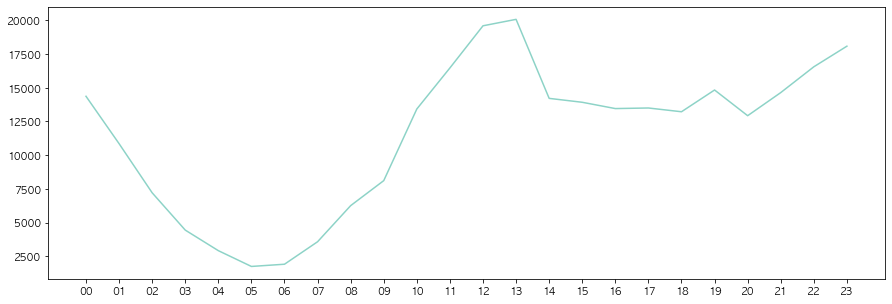

In [88]:
plt.figure(figsize=(15,5))
plt.plot(sam.시간, sam.주문회원수)

### 요일별 - 7그룹 시각화

- 요일에 숫자 코드 추가

In [10]:
df_date['요일코드'] = df_date['하루배송 이용일자'].dt.strftime('%w').astype(int)

- 0: 일 / 1: 월 / 2: 화 / 3: 수 / 4: 목 / 5: 금 / 6: 토

In [135]:
df_date.head()

,하루배송 이용일자,요일,시간,시,요일코드
0,2021-03-01 00:13:33,Monday,00:13:33,00,1
1,2021-03-02 05:06:36,Tuesday,05:06:36,05,2
2,2021-03-02 10:20:50,Tuesday,10:20:50,10,2
3,2021-03-02 10:29:30,Tuesday,10:29:30,10,2
4,2021-03-02 11:08:08,Tuesday,11:08:08,11,2


Text(0.5, 0, '토요일')

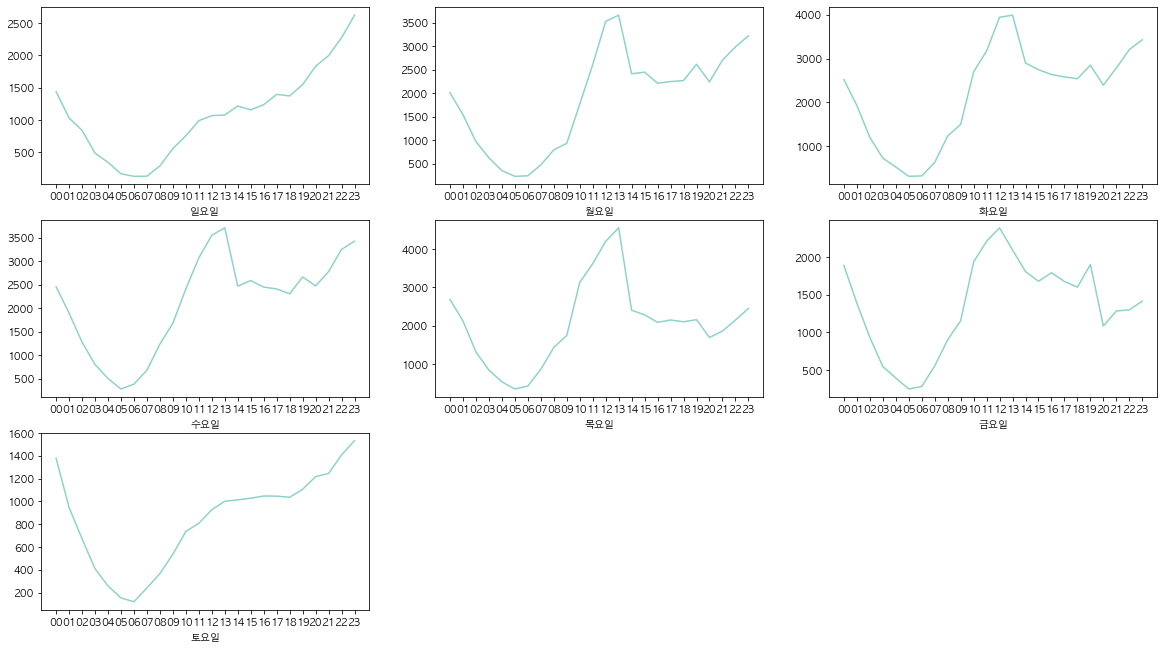

In [160]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(4, 3, 1)
ax2 = fig.add_subplot(4, 3, 2)
ax3 = fig.add_subplot(4, 3, 3)
ax4 = fig.add_subplot(4, 3, 4)
ax5 = fig.add_subplot(4, 3, 5)
ax6 = fig.add_subplot(4, 3, 6)
ax7 = fig.add_subplot(4, 3, 7)

for i in range(0, 7):
    globals()['sam{}'.format(i+1)] = df_date[df_date['요일코드'] == i]['시'].value_counts().to_frame().reset_index().rename(columns={'index':'시간', '시':'회원수'}).sort_values(by='시간')

ax1.plot(sam1.시간, sam1.회원수)
ax1.set_xlabel('일요일')

ax2.plot(sam2.시간, sam2.회원수)
ax2.set_xlabel('월요일')

ax3.plot(sam3.시간, sam3.회원수)
ax3.set_xlabel('화요일')

ax4.plot(sam4.시간, sam4.회원수)
ax4.set_xlabel('수요일')

ax5.plot(sam5.시간, sam5.회원수)
ax5.set_xlabel('목요일')

ax6.plot(sam6.시간, sam6.회원수)
ax6.set_xlabel('금요일')

ax7.plot(sam7.시간, sam7.회원수)
ax7.set_xlabel('토요일')


In [ ]:
- (월, 화, 수) 19-20부터 소폭 상승
 > 대학생, 직장인 모두 포함이겠지만, 현재 하루배송을 주로 이용하는 연령층이 26 > 25 > 24
- (목) 다른 평일보다 상승폭 낮음. 점심 이후로 급격히 낮아지는 편
- (금) 16시경, 18-19시경 2번 소폭 오름. => 기존 평일보다 전체적으로 시간이 앞당겨짐. / 19시 이후로 구매율이 낮아짐(ex. 주말 약속)

### 주말, 평일 - 2그룹 시각화

Text(0.5, 0, '주말 하루배송 주문 시간대')

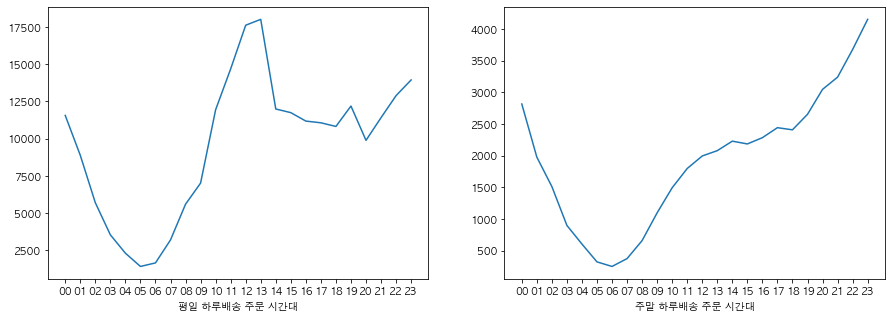

In [11]:
fig = plt.figure(figsize=(15,5))
ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

weekday = df_date[-((df_date['요일코드'] == 0)|(df_date['요일코드'] == 6))]['시'].value_counts().to_frame().reset_index().rename(columns={'index':'시간', '시':'주문수'}).sort_values(by='시간')
weekend = df_date[(df_date['요일코드'] == 0)|(df_date['요일코드'] == 6)]['시'].value_counts().to_frame().reset_index().rename(columns={'index':'시간', '시':'주문수'}).sort_values(by='시간')

ax_1.plot(weekday.시간, weekday.주문수)
ax_1.set_xlabel('평일 하루배송 주문 시간대')
ax_2.plot(weekend.시간, weekend.주문수)
ax_2.set_xlabel('주말 하루배송 주문 시간대')

In [12]:
weekday

,시간,주문수
9,00,11554
15,01,8877
17,02,5696
19,03,3542
21,04,2310
23,05,1420
22,06,1657
20,07,3201
18,08,5597
16,09,7014


In [175]:
weekend

,시간,주문수
4,00,2817
13,01,1978
15,02,1513
18,03,899
20,04,605
22,05,323
23,06,251
21,07,375
19,08,659
17,09,1098


In [ ]:
- [평일] 점심(12-14)에 급상승.(그 중 13시가 피크) / 새벽 5시쯤 최저점
- 19시 기점으로 소폭 상승(ex. 퇴근길)
- 21시부터 24시까지 판매 급상승

- [주말] 평일과 약간 다른 양상: 새벽 6시 최저점(평일보다 1시간 밀림)
- 9시부터 꾸준히 상승세를 이루며, 19시부터 24시(전까지) 가파르게 상승